# Introduction

## Basics

In [2]:
import numpy as np
import scipy as sp
from IPython.display import JSON
import json

In [2]:
NPinfo = {
    'numpy_version': np.__version__
}
SPinfo = {
    'scipy_version': sp.__version__
}
print(NPinfo, SPinfo)

{'numpy_version': '1.17.1'} {'scipy_version': '1.3.1'}


### Numpy Consts

In [13]:
consts = np.e, np.pi, np.euler_gamma
consts

(2.718281828459045, 3.141592653589793, 0.5772156649015329)

In [14]:
list(map(type, consts))

[float, float, float]

In [11]:
literals = np.inf, np.nan, np.NAN, np.NINF, np.PINF, np.NZERO, np.PZERO
literals

(inf, nan, nan, -inf, inf, -0.0, 0.0)

In [12]:
list(map(type, literals))

[float, float, float, float, float, float, float]

## N-D Struct

### Array

In [7]:
d1 = np.array(range(20))
d1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [10]:
def array_info(arr):
    return {
        'shape': arr.shape,
        'size': arr.size,
        'ndim': arr.ndim,
        'dtype': arr.dtype,
        'nbytes': arr.nbytes,
        'data': arr.data
    }
array_info(d1)

{'shape': (20,),
 'size': 20,
 'ndim': 1,
 'dtype': dtype('int32'),
 'nbytes': 80,
 'data': <memory at 0x00000132EFB21AC8>}

In [21]:
d1_0 = np.zeros(20)
d1_1 = np.ones(20)

d_range = np.arange(20)

d1_0, d1_1, d_range

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]))

In [67]:
d1 = np.linspace(0, 19, 20)
d2 = np.logspace(0, 4, 10)
d3 = np.geomspace(1, 10000, 10)

d1, d2, d3

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
        5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
        3.59381366e+03, 1.00000000e+04]),
 array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
        5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
        3.59381366e+03, 1.00000000e+04]))

In [11]:
np.random.random(size=(10, 2))
np.random.rand(10, 2)
np.random.randn(10, 2)
np.random.randint(0,100,size=(10, 2))


array([[92, 75],
       [52, 59],
       [18, 28],
       [40, 79],
       [94, 42],
       [80, 96],
       [76, 36],
       [88, 52],
       [67, 25],
       [14, 14]])

In [50]:
d4 = np.full((2,4), dtype=np.int32, fill_value=2)
d5 = np.empty((4,5), np.int64)

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]), array([[0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]]), array([[2, 2, 2, 2],
        [2, 2, 2, 2]]), array([[                  0, 4607182418800017408, 4611686018427387904,
         4613937818241073152, 4616189618054758400],
        [4617315517961601024, 4618441417868443648, 4619567317775286272,
         4620693217682128896, 4621256167635550208],
        [4621819117588971520, 4622382067542392832, 4622945017495814144,
         4623507967449235456, 4624070917402656768],
        [4624633867356078080, 4625196817309499392, 4625478292286210048,
         4625759767262920704, 4626041242239631360]], dtype=int64))

In [3]:
m1 = np.eye(5)
m2 = np.eye(5, k=-1)
m3 = np.identity(5)
m4 = np.identity(5, dtype=np.int32)
m5 = np.tri(4, 4, k=1, dtype=np.int32)
m6  = np.tril(np.full((4,5), fill_value=2), k=1)
m8  = np.triu(np.full((4,5), fill_value=2), k=-1)

In [61]:
d3[:, 0, 0]

array([ 0, 15, 30, 45])

In [67]:
d3t[0,0,:]

array([ 0, 15, 30, 45])

### Broadcasting

In [26]:
ar

array([[0, 1, 2]])

In [25]:
A1 = np.arange(9).reshape((3,3))
ar = np.arange(3).reshape(1,3)
ar.shape
A1*ar

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

In [22]:
A1 = np.arange(9).reshape((3,3))
ar = np.arange(3).reshape(3,1)
ar.shape
A1*ar

array([[ 0,  0,  0],
       [ 3,  4,  5],
       [12, 14, 16]])

In [21]:
A1 = np.arange(9).reshape((3,3))
ar = np.arange(3)
ar.shape
A1*ar

array([[ 0,  1,  4],
       [ 0,  4, 10],
       [ 0,  7, 16]])

### Array Manipulation

#### reshape and flatten

In [51]:
d3 = np.arange(4*5*3).reshape(4,5,3)

d4 = np.reshape(d3, (5, 6, 2))

d3, d4

(array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]],
 
        [[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]],
 
        [[30, 31, 32],
         [33, 34, 35],
         [36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],
 
        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]]]), array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7],
         [ 8,  9],
         [10, 11]],
 
        [[12, 13],
         [14, 15],
         [16, 17],
         [18, 19],
         [20, 21],
         [22, 23]],
 
        [[24, 25],
         [26, 27],
         [28, 29],
         [30, 31],
         [32, 33],
         [34, 35]],
 
        [[36, 37],
         [38, 39],
         [40, 41],
         [42, 43],
         [44, 45],
         [46, 47]],
 
        [[48, 49],
         [50, 51],
         [52, 53],
    

In [52]:
d3t = d3.T

d3.shape, d3t.shape

((4, 5, 3), (3, 5, 4))

In [53]:
arr1 = np.ravel(d3)
arr2 = d3.flatten()
arr3 = d3.flatten('F')

arr1, arr2, arr3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([ 0, 15, 30, 45,  3, 18, 33, 48,  6, 21, 36, 51,  9, 24, 39, 54, 12,
        27, 42, 57,  1, 16, 31, 46,  4, 19, 34, 49,  7, 22, 37, 52, 10, 25,
        40, 55, 13, 28, 43, 58,  2, 17, 32, 47,  5, 20, 35, 50,  8, 23, 38,
        53, 11, 26, 41, 56, 14, 29, 44, 59]))

#### repeat and tile

In [69]:
np.tile(arr, (2,2))

array([[ 0.        , -0.21409452,  0.9655793 ,  0.05575487, -1.00380083,
        -0.37665468, -0.53099835, -1.91977208,  0.85039898, -0.3068504 ,
        -0.2867291 ,  0.27619058, -0.34656925,  0.3645035 , -0.24805456,
         1.16732428, -0.76112911, -0.10640411, -0.27323123,  0.6036493 ,
         0.        , -0.21409452,  0.9655793 ,  0.05575487, -1.00380083,
        -0.37665468, -0.53099835, -1.91977208,  0.85039898, -0.3068504 ,
        -0.2867291 ,  0.27619058, -0.34656925,  0.3645035 , -0.24805456,
         1.16732428, -0.76112911, -0.10640411, -0.27323123,  0.6036493 ],
       [ 0.        , -0.21409452,  0.9655793 ,  0.05575487, -1.00380083,
        -0.37665468, -0.53099835, -1.91977208,  0.85039898, -0.3068504 ,
        -0.2867291 ,  0.27619058, -0.34656925,  0.3645035 , -0.24805456,
         1.16732428, -0.76112911, -0.10640411, -0.27323123,  0.6036493 ,
         0.        , -0.21409452,  0.9655793 ,  0.05575487, -1.00380083,
        -0.37665468, -0.53099835, -1.91977208,  0.

In [67]:
np.repeat(arr, 2)

array([ 0.        ,  0.        , -0.21409452, -0.21409452,  0.9655793 ,
        0.9655793 ,  0.05575487,  0.05575487, -1.00380083, -1.00380083,
       -0.37665468, -0.37665468, -0.53099835, -0.53099835, -1.91977208,
       -1.91977208,  0.85039898,  0.85039898, -0.3068504 , -0.3068504 ,
       -0.2867291 , -0.2867291 ,  0.27619058,  0.27619058, -0.34656925,
       -0.34656925,  0.3645035 ,  0.3645035 , -0.24805456, -0.24805456,
        1.16732428,  1.16732428, -0.76112911, -0.76112911, -0.10640411,
       -0.10640411, -0.27323123, -0.27323123,  0.6036493 ,  0.6036493 ])

#### split and stack, concatenate

In [2]:
a = np.arange(4*4*4).reshape(4,4,4)

In [11]:
x, y = np.vsplit(a, 2)
x.shape, y.shape

((2, 4, 4), (2, 4, 4))

In [10]:
x, y = np.hsplit(a, 2)
x.shape, y.shape

((4, 2, 4), (4, 2, 4))

In [9]:
x, y = np.dsplit(a, 2)
x.shape, y.shape

((4, 4, 2), (4, 4, 2))

In [7]:
x, y = np.split(a, 2, axis=0)
x.shape, y.shape

((2, 4, 4), (2, 4, 4))

In [54]:
arr1 = np.arange(10)
arr2 = np.arange(10,20)

d2 = np.stack((arr1, arr2))
d3 = np.stack((arr1, arr2), axis=1)

d2, d3

(array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]), array([[ 0, 10],
        [ 1, 11],
        [ 2, 12],
        [ 3, 13],
        [ 4, 14],
        [ 5, 15],
        [ 6, 16],
        [ 7, 17],
        [ 8, 18],
        [ 9, 19]]))

In [112]:
d = np.arange(20).reshape(2,5,2)

sd = np.split(d, [1], axis=2)

list(map(lambda x: x.shape, sd))


[(2, 5, 1), (2, 5, 1)]

- flip and roll

In [ ]:
np.flip(); np.fliplr(); np.flipud()
np.roll(); np.rot90()

In [120]:
d= np.arange(4*5*3).reshape(4,5,3)
df0 = np.flip(d, axis=0)

print(d.shape, df0.shape)

d, df0

(4, 5, 3) (4, 5, 3)


(array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]],
 
        [[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]],
 
        [[30, 31, 32],
         [33, 34, 35],
         [36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],
 
        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]]]), array([[[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],
 
        [[30, 31, 32],
         [33, 34, 35],
         [36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],
 
        [[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]],
 
        [[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]]))

In [121]:
d= np.arange(4*5*3).reshape(4,5,3)
df0 = np.flip(d, axis=1)

print(d.shape, df0.shape)

d, df0

(4, 5, 3) (4, 5, 3)


(array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]],
 
        [[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]],
 
        [[30, 31, 32],
         [33, 34, 35],
         [36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],
 
        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]]]), array([[[12, 13, 14],
         [ 9, 10, 11],
         [ 6,  7,  8],
         [ 3,  4,  5],
         [ 0,  1,  2]],
 
        [[27, 28, 29],
         [24, 25, 26],
         [21, 22, 23],
         [18, 19, 20],
         [15, 16, 17]],
 
        [[42, 43, 44],
         [39, 40, 41],
         [36, 37, 38],
         [33, 34, 35],
         [30, 31, 32]],
 
        [[57, 58, 59],
         [54, 55, 56],
         [51, 52, 53],
         [48, 49, 50],
         [45, 46, 47]]]))

In [127]:
d= np.arange(4*5*3).reshape(4,5,3)

dr0 = np.roll(d, 5*3, axis=0)

print(d.shape, dr0.shape)

d, dr0

(4, 5, 3) (4, 5, 3)


(array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]],
 
        [[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]],
 
        [[30, 31, 32],
         [33, 34, 35],
         [36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],
 
        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]]]), array([[[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]],
 
        [[30, 31, 32],
         [33, 34, 35],
         [36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],
 
        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],
 
        [[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]]))

In [128]:
d= np.arange(4*5*3).reshape(4,5,3)

dr0 = np.rot90(d)

print(d.shape, dr0.shape)

d, dr0

(4, 5, 3) (5, 4, 3)


(array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]],
 
        [[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]],
 
        [[30, 31, 32],
         [33, 34, 35],
         [36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]],
 
        [[45, 46, 47],
         [48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]]]), array([[[12, 13, 14],
         [27, 28, 29],
         [42, 43, 44],
         [57, 58, 59]],
 
        [[ 9, 10, 11],
         [24, 25, 26],
         [39, 40, 41],
         [54, 55, 56]],
 
        [[ 6,  7,  8],
         [21, 22, 23],
         [36, 37, 38],
         [51, 52, 53]],
 
        [[ 3,  4,  5],
         [18, 19, 20],
         [33, 34, 35],
         [48, 49, 50]],
 
        [[ 0,  1,  2],
         [15, 16, 17],
         [30, 31, 32],
         [45, 46, 47]]]))

In [96]:
d3[0, 0, :]

array([0, 1, 2])

In [97]:
d3t[0, 0, :]

array([ 0, 15, 30, 45])

### View and Copy

- ndarray's view reference the same underline address space, but have different id
- ndarray's assignment reference the same underline address space and also have the same id
- ndarray's copy reference the different address space and have different id

In [54]:
arr = np.random.randn(20)
b = arr
c = arr.view()
id(arr) == id(b), id(b) == id(c) 

(True, False)

In [56]:
cp = arr.copy()

### Concatenate, Append, Insert, Update, Delete

In [ ]:
np.concatenate()

In [60]:
np.append(arr, [1,2,3,4], axis=0)

array([ 1.06677087, -0.21409452,  0.9655793 ,  0.05575487, -1.00380083,
       -0.37665468, -0.53099835, -1.91977208,  0.85039898, -0.3068504 ,
       -0.2867291 ,  0.27619058, -0.34656925,  0.3645035 , -0.24805456,
        1.16732428, -0.76112911, -0.10640411, -0.27323123,  0.6036493 ,
        1.        ,  2.        ,  3.        ,  4.        ])

In [61]:
np.insert(arr, 0, 10)

array([10.        ,  1.06677087, -0.21409452,  0.9655793 ,  0.05575487,
       -1.00380083, -0.37665468, -0.53099835, -1.91977208,  0.85039898,
       -0.3068504 , -0.2867291 ,  0.27619058, -0.34656925,  0.3645035 ,
       -0.24805456,  1.16732428, -0.76112911, -0.10640411, -0.27323123,
        0.6036493 ])

- in-place change

In [63]:
arr[0]=0
arr

array([ 0.        , -0.21409452,  0.9655793 ,  0.05575487, -1.00380083,
       -0.37665468, -0.53099835, -1.91977208,  0.85039898, -0.3068504 ,
       -0.2867291 ,  0.27619058, -0.34656925,  0.3645035 , -0.24805456,
        1.16732428, -0.76112911, -0.10640411, -0.27323123,  0.6036493 ])

In [64]:
np.delete(arr, 0)

array([-0.21409452,  0.9655793 ,  0.05575487, -1.00380083, -0.37665468,
       -0.53099835, -1.91977208,  0.85039898, -0.3068504 , -0.2867291 ,
        0.27619058, -0.34656925,  0.3645035 , -0.24805456,  1.16732428,
       -0.76112911, -0.10640411, -0.27323123,  0.6036493 ])

### Array Operators

In [ ]:
np.bitwise_and()
np.bitwise_not()
np.bitwise_or()
np.bitwise_xor()

In [12]:
arr = np.random.randn(20)
arr

array([-0.43971388,  0.070735  , -0.19659446, -0.82686974,  1.14457598,
       -1.0486172 , -1.10823118, -0.12276342,  0.30292378,  0.19933342,
       -1.04005078,  0.09497685,  0.95108421,  1.31578652,  0.6322031 ,
        0.02200024, -0.02828549,  0.1370882 , -2.03905085, -0.32669728])

In [14]:
arr+10, arr-10, arr*10, arr/10
sum(arr>0)

10

In [ ]:
np.floor(arr)
np.ceil(arr)
np.sum(arr)
np.cumsum(arr)
np.cumproduct(arr)
np.unique(arr)
np.min(arr)
np.max(arr)

# Linear Algebra

- [Linear Algebra Doc](https://numpy.org/doc/1.17/reference/routines.linalg.html)

In [21]:
import numpy as np

In [23]:
dir(np.matlib)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_UFUNC_API',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 'absolute',
 'absolute_import',
 'add',
 'add_docstring',
 'add_newdoc',
 'add_newdoc_ufunc',
 'alen',
 'all',
 'allclose',

In [22]:
dir(np.linalg)

['LinAlgError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_umath_linalg',
 'absolute_import',
 'cholesky',
 'cond',
 'det',
 'division',
 'eig',
 'eigh',
 'eigvals',
 'eigvalsh',
 'info',
 'inv',
 'lapack_lite',
 'linalg',
 'lstsq',
 'matrix_power',
 'matrix_rank',
 'multi_dot',
 'norm',
 'pinv',
 'print_function',
 'qr',
 'slogdet',
 'solve',
 'svd',
 'tensorinv',
 'tensorsolve',
 'test']

## Matrix

- [Matrix Doc](https://numpy.org/doc/1.17/reference/routines.matlib.html)

In [25]:
import numpy as np
import numpy.matlib as mtx

In [26]:
A1 = mtx.rand(4,2)
A2 = mtx.randn(2,4)
A3 = mtx.mat(A1*A2)

A1, A2, A3

(matrix([[0.05395525, 0.21497501],
         [0.70770796, 0.81646857],
         [0.37112593, 0.33885063],
         [0.38326344, 0.18155835]]),
 matrix([[ 1.96458013,  0.80130716,  0.1063167 , -0.03900101],
         [ 1.97779931,  1.06765547, -1.67334701,  0.97493122]]),
 matrix([[ 0.53117685,  0.27275398, -0.35399145,  0.20748154],
         [ 3.00515998,  1.4387986 , -1.29099407,  0.76839938],
         [ 1.39928515,  0.65916158, -0.5275578 ,  0.31588177],
         [ 1.11203772,  0.5009535 , -0.26306282,  0.16205924]]))

In [ ]:
mtx.empty(shape[, dtype, order])
mtx.zeros(shape[, dtype, order])
mtx.ones(shape[, dtype, order])
mtx.eye(n[, M, k, dtype, order])
mtx.identity(n[, dtype])
mtx.repmat(a, m, n)


In [ ]:
a = np.mat()

In [78]:
d2 = np.eye(5)
d3 = np.eye(5, k=-1)

d2, d3

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]), array([[0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]]))

In [15]:
d2 = np.identity(5)
d3 = np.identity(5, dtype=np.int32)

d2, d3

(array([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]), array([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]]))

In [79]:
m1 = np.tri(4, 4, k=1, dtype=np.int32)
m2  = np.tril(np.full((4,5), fill_value=2), k=1)
m3  = np.triu(np.full((4,5), fill_value=2), k=-1)

m1, m2, m3

(array([[1, 1, 0, 0],
        [1, 1, 1, 0],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]), array([[2, 2, 0, 0, 0],
        [2, 2, 2, 0, 0],
        [2, 2, 2, 2, 0],
        [2, 2, 2, 2, 2]]), array([[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [0, 2, 2, 2, 2],
        [0, 0, 2, 2, 2]]))

## Matrix Operation

In [29]:
import numpy.linalg as lag

In [42]:
A = np.matlib.randn(4,4)
v = np.matlib.randn(4,1)
A, v

(matrix([[ 0.38276027, -0.77477859,  2.39661447, -0.29973329],
         [ 2.18927726, -0.62803249,  0.50454674,  1.64684823],
         [ 1.28833514,  0.06960588,  0.04590963, -0.14178456],
         [ 1.12685443, -1.19404941,  1.66671153, -0.14564166]]),
 matrix([[ 0.77317698],
         [-0.02277099],
         [ 0.4990158 ],
         [-0.25913431]]))

In [30]:
lag.det(A)

-2.082845477065814

In [31]:
lag.inv(A)

matrix([[-0.02534996,  0.0737456 , -0.36620377,  0.17181988],
        [-1.44232302, -1.91740879, -0.19060758, -0.69126863],
        [-0.33164806,  1.07505665,  0.53030056, -0.73604776],
        [ 0.55526033,  0.70631044, -0.20281189, -0.11870126]])

In [32]:
A.transpose()

matrix([[-1.85651084,  1.14255547, -1.80773915,  1.2028771 ],
        [ 0.05452927, -0.27165901, -0.3869938 , -0.70016703],
        [-0.71529946,  0.57212373,  0.10661302, -0.1238642 ],
        [ 1.43060585, -0.31176833, -1.02409292, -1.83779285]])

In [33]:
np.trace(A)

-3.85934968253094

In [39]:
A.shape, v.shape

((4, 4), (1, 4))

In [45]:
r = lag.solve(A, v)
A*r-v

matrix([[ 1.11022302e-16],
        [-3.46944695e-18],
        [ 5.55111512e-17],
        [-1.66533454e-16]])

In [50]:
lag.eig(A)

(array([ 1.34040578+0.j        , -1.15778855+0.j        ,
        -0.26381074+1.57161807j, -0.26381074-1.57161807j]),
 matrix([[ 0.42623363+0.j        ,  0.51217949+0.j        ,
          -0.03073873+0.2316187j , -0.03073873-0.2316187j ],
         [ 0.7612303 +0.j        , -0.56827682+0.j        ,
           0.81556391+0.j        ,  0.81556391-0.j        ],
         [ 0.44238528+0.j        , -0.55400724+0.j        ,
           0.14227839-0.02293519j,  0.14227839+0.02293519j],
         [ 0.20772237+0.j        , -0.32834373+0.j        ,
           0.17764576+0.47742669j,  0.17764576-0.47742669j]]))

In [51]:
lag.svd(A)

(matrix([[-0.5384389 ,  0.60233263,  0.1566291 , -0.56810762],
         [-0.57655279, -0.71596471,  0.3784859 , -0.10830438],
         [-0.20198765, -0.25705827, -0.88715479, -0.3256968 ],
         [-0.58040625,  0.24189044, -0.21253733,  0.74796088]]),
 array([3.84732942, 2.46358148, 0.91576801, 0.45406243]),
 matrix([[-0.61928361,  0.3790263 , -0.66486931, -0.17542995],
         [-0.56645098, -0.13141324,  0.59818666, -0.55139511],
         [-0.5393171 , -0.18238838,  0.18713914,  0.80053138],
         [-0.06897939, -0.89766592, -0.40632556, -0.1560041 ]]))

In [ ]:
np.dot(), np.vdot(), np.inner()

# Statistic

In [9]:
import numpy as np
from scipy import stats

- [Numpy Statistic docs](https://numpy.org/doc/1.17/reference/routines.statistics.html)

## Basic Statistic Concepts

## Variable Categories

- Numeric Variables
  - Continuous Variable
  - Discrete Variable
  - Interval Variable
  - Cardinal
  - Ratio

- Categorical Variables
  - Nominal Variable
  - Ordinal Variable

## Statistic Values

- mean(average):
> $$mean(s) = \frac{\sum_{i=1}^{n}\ x_i}{n}$$

- median: one of definitions
> $$\text{original series: s, sort s first to ranked series: r}.\\
        n:=|r|\\
       median(s) =   \left\{
                \begin{array}{cl}
                  r_{\frac{n+1}{2}} & \text{if n is odd} \\
                  \frac{r_{\frac{n}{2}}+r_{\frac{n}{2}+1}}{2} & \text{if n is even}
                \end{array}
              \right.
  $$ 

- mode: one of definitions
> $$
    \text{original series: s, sort s first to ranked series: r} \\ 
    \text{count r's element into C: } \\  
        C = \{(r_i, c_i) | r_i \in r, c_i = r.count(r_i)\} \\
        mode(s) = (r_m, c_m), \; c_m = Max(c_i),\ r_m = Min(r_k | c_k==c_m)
$$

- var: variance
> $$
\text{series $s$;  $\mu = mean(s); n = |s|$} \\
var(s) = \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2
$$

- percentile: one of definition
> $$
\text{seires $s$, sort into $o$} \\
\text{$r_{th}-percentile: $ linear interpolation C=0} \\
    given\ p \in (0, 100], \; \lambda=\frac{p}{100}, \; l=\lambda(|s|+1) \\
    x_{r_{th}} = \{o_{r}+\lambda(o_{r+1}-o_{r}) |\; r=\lfloor l \rfloor \}\\
    \\
$$

    > $$
        given\ x, \; find\ rank\ r \ where\ o_{r}<x\le o_{r+1} \\
        percentile(x) = \frac{r}{|s|}
    $$

- q-quantile: one of deinition
> $$
\text{seires $s$, sort into $o$} \\
\text{let $r_{th}$ percentile function as: $Pr$} \\
\mathop{\mbox{$q$-$\mathit{quantile}$}}(s) = \{(x_1, x_2, \ldots, x_{q-1})|x_i=Pr(i/q)\} 
$$

- z_score: z-score is the number of standard deviations from the mean a data point is

> $$
z = \frac{(x-\mu)}{\sigma},\; \text{$\mu$ is mean, $\sigma$ is standard deviation}\\
$$
z score tells you how many standard deviations from the mean your value $x$ is

- outlier
  - a data point that differs significantly from other observations
  - normally distributed data $\mathop{\mbox{$3$-$\mathit{\sigma}$}}$ rule
      - $z\_score(x) \ge 3$ then x is an outlier
  - Interquartile Ranges: IQR rule
      - $iqr=q_3-q_1,\; q_3=Pr(3/4), \; q_1=Pr(1/4)$
      - $outlier(x)={true|\ x < q_1-1.5\,iqr,\ or x > q_3+1.5\,iqr }$

array([ 2.93356687, -0.57927468, -0.3101838 , -0.05099034, -0.03424658,
       -0.49094202, -0.16700602, -0.14527633, -0.55709849, -0.59854861])

## Order statistics

In [ ]:
np.amin()
np.amax()
np.nanmin()
np.nanmax()
np.ptp()
np.percentile()
np.nanpercentile()
np.quantile()
np.nanquantile()

In [28]:
a1 = np.arange(101)
q = list(range(0, 101, 20))
np.percentile(a1, q)

array([  0.,  20.,  40.,  60.,  80., 100.])

In [27]:
a1 = np.arange(101)
q = np.linspace(0, 1, 6)
np.quantile(a1, q)

array([  0.,  20.,  40.,  60.,  80., 100.])

## Averages and variances

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
np.average()
np.median()
np.mean()
np.std()
np.var()
np.nanmedian()
np.nanmean()
np.nanstd()
np.nanvar()

In [16]:
mode = stats.mode(np.array([5,2,6,2,2,2,5,6,5,5,5,6,6,6,2]))
print(mode)

ModeResult(mode=array([2]), count=array([5]))


In [23]:
a = np.array([ 4.7972,  0.0767,  0.4383,  0.7866,  0.8091,  0.1954,  0.6307,  0.6599,  0.1065,  0.0508])
stats.zscore(a)

array([ 2.93356687, -0.57927468, -0.3101838 , -0.05099034, -0.03424658,
       -0.49094202, -0.16700602, -0.14527633, -0.55709849, -0.59854861])

## Correlating

In [ ]:
np.corrcoef()
np.correlate()
np.cov()

## Histogram

In [ ]:
np.histogram()
np.histogram2d()
np.histogramdd()
np.bincount()
np.histogram_bin_edges(
np.digitize()

# Random

## random generator
- np.random.randn, sigma * np.matlib.randn(...) + mu
  - [randn ref](https://www.numpy.org/devdocs/reference/generated/numpy.matlib.randn.html#numpy.matlib.randn)

In [17]:
import numpy.random as nprd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ri = nprd.randint(low=0, high=100, size=10)
ri

array([26, 23, 17,  6, 94, 75, 90, 44, 19, 68])

In [6]:
ri = nprd.randint(low=0, high=100, size=(4, 6, 3))
ri

array([[[58, 66, 70],
        [58, 10, 68],
        [94, 27, 32],
        [64, 76, 26],
        [79, 38, 16],
        [11, 42, 21]],

       [[99,  5, 25],
        [66, 55, 35],
        [46, 93, 75],
        [30, 11, 64],
        [58, 48, 63],
        [42,  8, 83]],

       [[63, 34, 63],
        [57, 35, 30],
        [45, 53, 99],
        [ 2, 92, 59],
        [21, 95, 84],
        [55, 79, 39]],

       [[50, 18, 12],
        [22, 73, 19],
        [61, 78, 20],
        [15,  6, 66],
        [61, 83, 49],
        [96, 78, 31]]])

In [3]:
rarr = nprd.rand(4, 6, 3)
rarr

array([[[0.72234849, 0.51418432, 0.3982604 ],
        [0.30710748, 0.99849228, 0.13723327],
        [0.59649077, 0.40308648, 0.70125702],
        [0.75981473, 0.36013678, 0.97066465],
        [0.09841878, 0.58747772, 0.08160544],
        [0.88467898, 0.75112714, 0.28043717]],

       [[0.52201459, 0.71987937, 0.73137731],
        [0.96128343, 0.01582618, 0.44245851],
        [0.32272249, 0.18562993, 0.65734396],
        [0.45169572, 0.04635571, 0.99673651],
        [0.04890552, 0.00861314, 0.91579517],
        [0.21994979, 0.03968544, 0.34933305]],

       [[0.2675421 , 0.01458211, 0.31737914],
        [0.08227559, 0.81127398, 0.67034405],
        [0.45175484, 0.38027625, 0.88475846],
        [0.60463965, 0.95555319, 0.18782969],
        [0.8759184 , 0.57862607, 0.91315503],
        [0.85515017, 0.14135297, 0.03804333]],

       [[0.6117738 , 0.03965089, 0.61338096],
        [0.44110077, 0.93383291, 0.4127729 ],
        [0.96542994, 0.29815438, 0.88721956],
        [0.13315463, 0.16117

In [4]:
rarr = nprd.randn(4, 6, 3)
rarr

array([[[ 0.35715893,  1.37895156, -0.25494014],
        [ 1.18074357,  0.6258577 ,  0.63421037],
        [-1.09982065,  1.03952686, -0.88925539],
        [-1.13159392,  0.00550192,  1.01824599],
        [-0.92819026, -0.54640356,  2.38966738],
        [-0.75645107,  0.48493713,  0.32744655]],

       [[ 0.60210743, -0.39397644, -0.83636314],
        [ 1.35155155,  0.21559443, -0.98606471],
        [ 0.15020375,  1.52023747,  0.5644494 ],
        [ 0.28461505, -0.15958924,  0.38778651],
        [-0.8505432 ,  0.31222595, -1.1754124 ],
        [-0.08825642, -0.54538567, -0.97876592]],

       [[-0.92562318, -0.5529631 ,  0.23486756],
        [ 0.8205693 , -0.7819036 ,  0.60362279],
        [-0.46940693,  0.31949625,  0.56621945],
        [ 0.22199533,  1.04194966, -0.92994889],
        [-0.54847033, -0.91093192,  0.74965635],
        [ 0.46975711,  0.08813544, -0.23117627]],

       [[-0.32162944, -0.09237148, -0.19592241],
        [ 1.79975884, -0.47504965,  0.06206034],
        [ 0.27

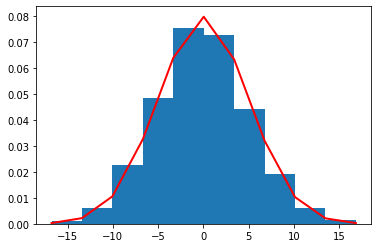

In [22]:
mu, sigma = 0, 5
nd = nprd.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(nd, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()